# Exercise 2 - Implementation of Univariate and Multivariate Gaussian density

## a)Univariate and Multivariate distributions

### Program 1 - Generating and visualizing Univariate and Multivariate distributions

#### AIM:
To generate, visualize and analyze various univariate and multivariate normal distributions.

#### Formula:
##### Univariate Normal:
$$
\mathcal{N}(x,\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}}\mathrm{exp}\left(
-\frac{(x-\mu)^2}{\sigma^2}
\right)\\
$$
where,  
$\mu$ - Mean  
$\sigma$ - Variance

##### Multivariate Normal:
$$
\mathcal{N}(\mathbf{x},\mu,\Sigma) = \frac{1}{\sqrt{(2\pi)^d|\Sigma|}}\mathrm{exp}\left(
-(\mathbf{x}-\mu)^T\Sigma^{-1}(\mathbf{x}-\mu)
\right)
$$

where,  
$\mu$ - Mean vector  
$\Sigma$ - Covariance matrix  
$|\Sigma|$ - Determinant of $\Sigma$  
$\Sigma^{-1}$ - Inverse of $\Sigma$  
$d$ - No. of dimensions



#### Part 1 - Univariate Normal Distribution

In [1]:
import numpy as np
import matplotlib.pyplot as plt

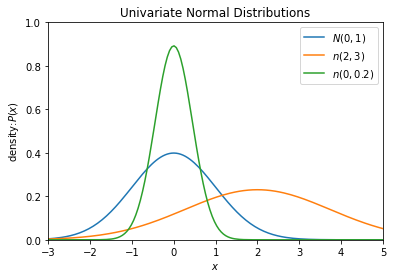

In [2]:
def univariate_normal(x, mean, variance):
    return 1/np.sqrt(2*np.pi*variance) \
        *np.exp(-(x-mean)**2/(2*variance))

x = np.linspace(-3, 5, 150)
fig = plt.figure(figsize=(6, 4))
plt.plot(x, univariate_normal(x, 0, 1), label="$N(0,1)$")
plt.plot(x, univariate_normal(x, 2, 3), label="$n(2,3)$")
plt.plot(x, univariate_normal(x, 0, 0.2), label="$n(0,0.2)$")
plt.title("Univariate Normal Distributions")
plt.xlabel("$x$")
plt.ylabel("density:$P(x)$")
plt.xlim((-3, 5))
plt.ylim((0, 1))
plt.legend()
plt.show()

#### Part 2 - Multivariate Normal Distribution

In [3]:
def multivariate_normal(x, mean, cov):
    d,x_m = mean.shape[0],x-mean
    cov_det, cov_inv = np.linalg.det(cov),np.linalg.inv(cov)
    return 1/np.sqrt((2*np.pi)**d*cov_det)\
        *np.exp(-(np.einsum("...i,ij,...j",x_m,cov_inv,x_m))/2)

def generate_surface(mean, cov):
    x = np.linspace(-5, 5,100)
    x1, x2= np.meshgrid(x,x)
    pdf = multivariate_normal(np.dstack([x1,x2]),mean,cov)
    return x1,x2, pdf

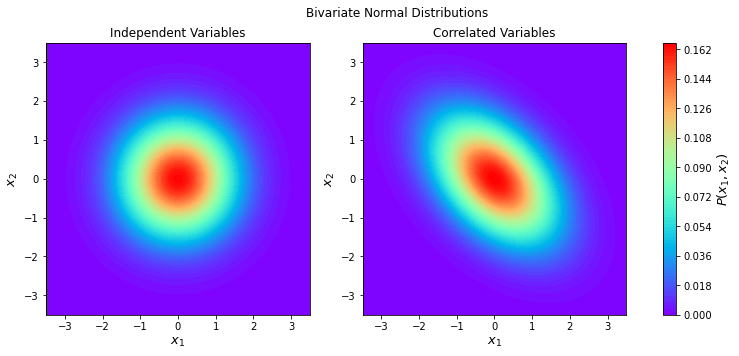

In [4]:
distributions = [
    (np.zeros(2),np.eye(2)),
    (np.zeros(2),np.array([[1, -0.1], [-0.8, 1]]))
]

fig, ax = plt.subplots(1, 2, figsize=(13, 5))
plt.suptitle("Bivariate Normal Distributions")
ax[0].set_title("Independent Variables")
ax[1].set_title("Correlated Variables")
for i, dist in enumerate(distributions):
    x1, x2, pdf = generate_surface(*dist)
    con = ax[i].contourf(x1, x2, pdf, 100, cmap='rainbow')
    ax[i].set_xlabel("$x_1$", fontsize=13)
    ax[i].set_ylabel("$x_2$", fontsize=13)
    ax[i].axis([-3.5, 3.5, -3.5, 3.5])

c_bar = fig.colorbar(con, ax = ax)
c_bar.ax.set_ylabel("$P(x_1,x_2)$", fontsize=13)
plt.show()